# Prédiction du churn client  
## Exploration des données


Dans ce notebook, nous réalisons une première exploration du jeu de données Telco Customer Churn afin de comprendre la structure des données et les variables disponibles.


Objectifs :
- Comprendre la structure du jeu de données
- Identifier les types de variables
- Repérer les valeurs manquantes
- Analyser la distribution de la variable cible (Churn)


In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("/Users/yassinedziba/churn-client/data/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Nous commençons par examiner la structure globale du jeu de données, notamment le nombre d’observations, le nombre de variables et leurs types.


In [4]:
df.shape

(7043, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.describe()


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Le jeu de données contient plusieurs variables catégorielles
et numériques. Certaines variables numériques semblent
stockées sous forme de texte, ce qui nécessitera un
prétraitement ultérieur.


## Analyse de la variable cible : Churn

La variable `Churn` indique si un client a quitté le service.
Il s’agit d’un problème de classification binaire.


In [7]:
df["Churn"].value_counts()


Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [8]:
df["Churn"].value_counts(normalize=True)


Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64

Si ~25–30 % des clients churnent → dataset déséquilibré  
Ça aura un impact sur :  
le choix des métriques  
l’évaluation des modèles

La majorité des clients ne churnent pas. Le problème est donc déséquilibré, ce qui implique de ne pas se baser uniquement sur l’accuracy lors de l’évaluation des modèles.

<Axes: xlabel='Churn'>

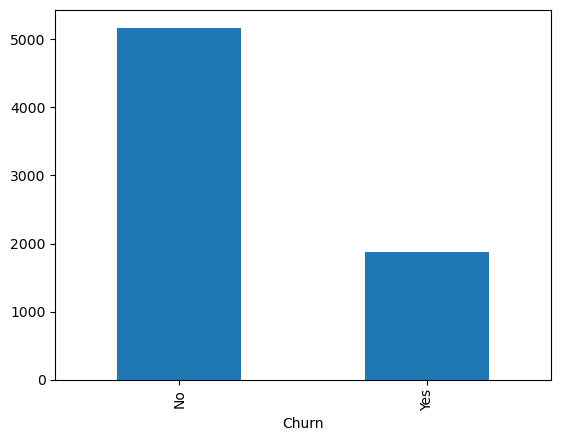

In [9]:
df["Churn"].value_counts().plot(kind="bar")


On observe un déséquilibre entre les classes :
la majorité des clients ne churnent pas.
Ce déséquilibre devra être pris en compte lors
de l’évaluation des modèles.


## Valeurs manquantes et incohérences

Avant toute modélisation, il est essentiel d’identifier
les éventuelles valeurs manquantes ou incohérences dans les données.


In [10]:
df.isnull().sum()


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [11]:
df["TotalCharges"].head()


0      29.85
1     1889.5
2     108.15
3    1840.75
4     151.65
Name: TotalCharges, dtype: object

In [12]:
df["TotalCharges"].dtype


dtype('O')

In [13]:
df[df["TotalCharges"] == " "].head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No


Le jeu de données contient des incohérences dans la variable TotalCharges, qui nécessiteront un traitement spécifique avant la modélisation.

La variable `TotalCharges` est stockée sous forme de texte
et contient des valeurs vides. Ces incohérences sont
principalement liées à des clients récents avec une ancienneté nulle.
Un traitement spécifique sera nécessaire.


## Analyse univariée des variables numériques

Nous analysons la distribution des principales variables numériques
afin de mieux comprendre les profils clients présents dans le jeu de données.


### Ancienneté des clients (`tenure`)

Cette variable représente la durée (en mois) depuis laquelle
un client est abonné au service.


In [14]:
df["tenure"].describe()


count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

<Axes: >

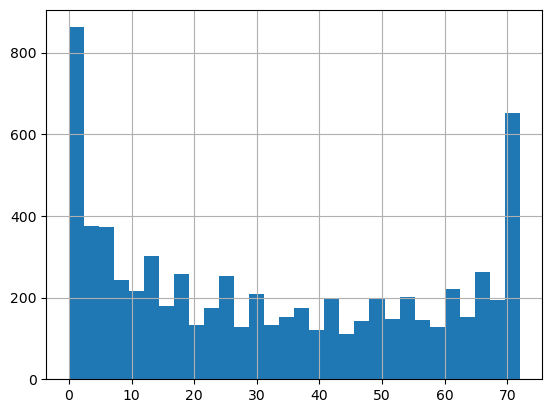

In [15]:
df["tenure"].hist(bins=30)


On observe une forte concentration de clients récents,
avec une distribution asymétrique vers les fortes anciennetés.


### Charges mensuelles (`MonthlyCharges`)

Cette variable correspond au montant facturé mensuellement
aux clients.


In [16]:
df["MonthlyCharges"].describe()


count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

<Axes: >

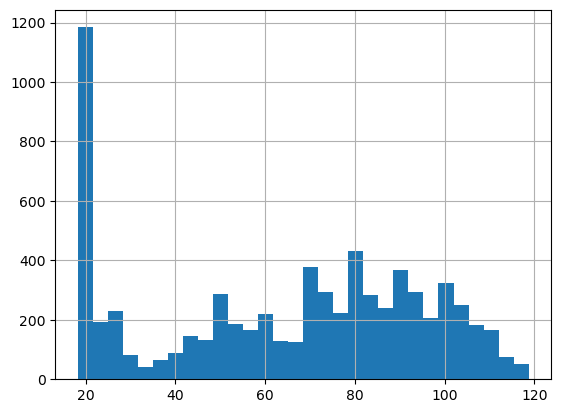

In [17]:
df["MonthlyCharges"].hist(bins=30)

Les charges mensuelles présentent une forte dispersion, ce qui suggère l’existence de plusieurs profils tarifaires.


### Charges totales (`TotalCharges)

Cette variable dépend fortement de l’ancienneté du client.


In [18]:
df["TotalCharges"].head()


0      29.85
1     1889.5
2     108.15
3    1840.75
4     151.65
Name: TotalCharges, dtype: object

### Conclusion de l’exploration

Cette analyse exploratoire a permis d’identifier les principales caractéristiques du jeu de données, les incohérences à corriger et les variables clés à analyser en lien avec le churn client.


## Analyse bivariée : variables explicatives et churn

Dans cette section, nous étudions la relation entre certaines
variables explicatives et la variable cible `Churn`.
L’objectif est d’identifier des facteurs potentiellement
associés au départ des clients.


### Churn et ancienneté (`tenure`)

L’ancienneté est souvent un facteur clé du churn.
Les clients récents sont généralement plus susceptibles
de quitter le service que les clients fidèles.


In [19]:
df.groupby("Churn")["tenure"].describe()

,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
No,5174.0,37.569965,24.113777,0.0,15.0,38.0,61.0,72.0
Yes,1869.0,17.979133,19.531123,1.0,2.0,10.0,29.0,72.0


<Axes: title={'center': 'tenure'}, xlabel='Churn'>

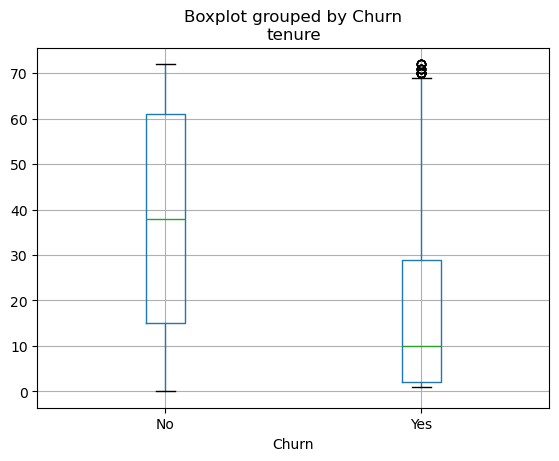

In [20]:
df.boxplot(column="tenure", by = "Churn")

On observe une ancienneté médiane nettement plus faible
chez les clients ayant churné.  
Cela suggère que le churn est plus fréquent parmi les
clients récents.


### Churn et charges mensuelles (`MonthlyCharges`)

Les charges mensuelles reflètent le niveau de services
souscrits par les clients. Des montants élevés peuvent
être associés à une insatisfaction ou à une sensibilité
au prix.


In [21]:
df.groupby("Churn")["MonthlyCharges"].describe()

,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
No,5174.0,61.265124,31.092648,18.25,25.10,64.425,88.4,118.75
Yes,1869.0,74.441332,24.666053,18.85,56.15,79.650,94.2,118.35


<Axes: title={'center': 'MonthlyCharges'}, xlabel='Churn'>

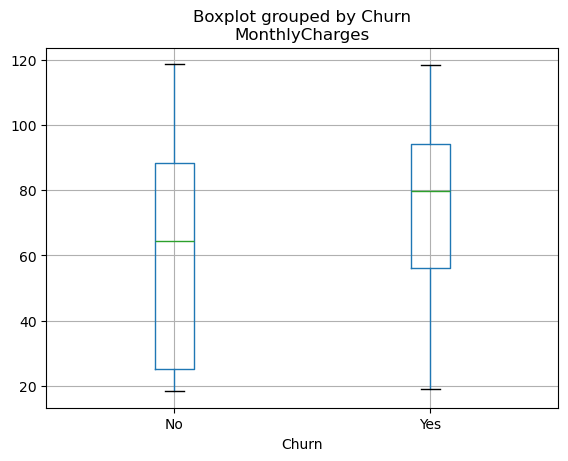

In [22]:
df.boxplot(column="MonthlyCharges", by = "Churn")

Les clients ayant churné présentent en moyenne
des charges mensuelles plus élevées.
Cela suggère un lien potentiel entre niveau de facturation
et risque de churn.


### Churn et type de contrat

Le type de contrat (mensuel, annuel, biannuel)
est un facteur important de fidélisation.


In [23]:
pd.crosstab(df["Contract"], df["Churn"], normalize = "index")

Churn,No,Yes
Contract,,
Month-to-month,0.572903,0.427097
One year,0.887305,0.112695
Two year,0.971681,0.028319


On observe un taux de churn nettement plus élevé
pour les contrats mensuels que pour les contrats
de longue durée.  
Cela confirme l’importance du type de contrat
dans la prédiction du churn.


### Churn et service Internet

Le type de service Internet peut influencer
la satisfaction client et le risque de churn.


In [24]:
pd.crosstab(df["InternetService"], df["Churn"], normalize = "index")

Churn,No,Yes
InternetService,,
DSL,0.810409,0.189591
Fiber optic,0.581072,0.418928
No,0.925950,0.074050


Certains types de services Internet présentent
des taux de churn plus élevés, ce qui suggère
une hétérogénéité des profils clients selon
les services souscrits.


### Conclusion de l’analyse bivariée

L’analyse bivariée met en évidence plusieurs variables
fortement associées au churn, notamment :
- l’ancienneté du client,
- le niveau des charges mensuelles,
- le type de contrat,
- certains services souscrits.

Ces résultats confirment la pertinence de ces variables
pour la phase de modélisation.
